# TASK 4 : Prediction Using Decision Tree Algorithm
* Task is to create the Decision Tree classifier and visualize it graphically for *iris* dataset.
* The main purpose is if we feed any new data to this classifier,it should be able to predict the right class accordingly. 

## 1. Importing libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
import seaborn as sns

## 2. Exploring and Analysing the data

In [3]:
# loading dataset
data = pd.read_csv('Iris.csv')
data.head(10)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
# species of iris dataset
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [6]:
# encoding species names
species = {
    'Iris-setosa' : 0,
    'Iris-versicolor' : 1,
    'Iris-virginica' : 2
}

data['Species'] = data['Species'].map(species)
data.Species.unique()

array([0, 1, 2])

In [7]:
# splitting input and output data
X = data.iloc[:,1:5].values
y = data.iloc[:,5].values

In [8]:
# To check if data is split accordingly
print(X.shape)
print(y.shape)

(150, 4)
(150,)


/home/kuluruvineeth/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


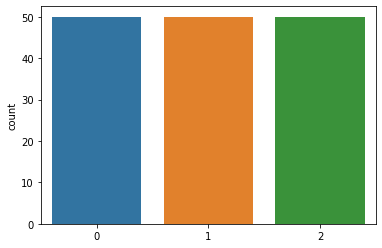

In [9]:
# check for balanced dataset
sns.countplot(y)
pyplot.show()

### Observation
* Data is equally balanced among three species.

## 3. Train Test Split

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=7)

## 4. Decision Tree Classifier

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [14]:
y_pred = model.predict(X_test)
print(y_pred)

[2 1 0 1 2 0 1 1 0 1 2 1 0 2 0 2 2 2 0 0 1 2 1 1 1 2 1 1 2 2]


## 5. Evaluating Algorithm

In [15]:
from sklearn import metrics

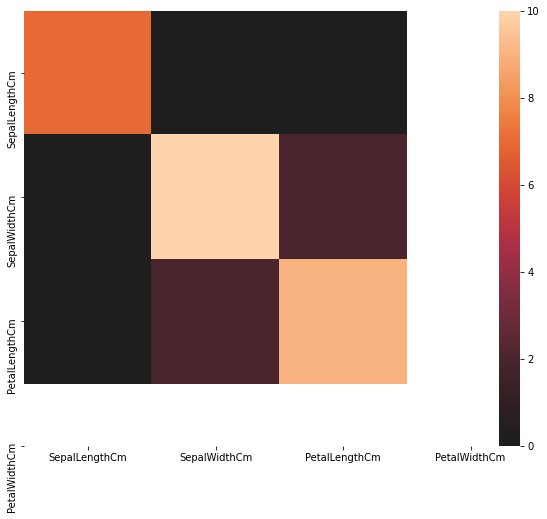

In [16]:
pyplot.figure(figsize=(10,8))
sns.heatmap(metrics.confusion_matrix(y_test,y_pred),xticklabels=data.iloc[:,1:5].columns.values,yticklabels=data.iloc[:,1:5].columns.values,center=0)
pyplot.show()

In [18]:
print(f"Precision: {metrics.precision_score(y_test, y_pred, average = 'macro')}")
print(f"Recall: {metrics.recall_score(y_test, y_pred, average = 'macro')}")
print(f"F1 Score: {metrics.f1_score(y_test, y_pred, average = 'macro')}")



Precision: 0.883838383838384
Recall: 0.883838383838384
F1 Score: 0.883838383838384


## 6. Visualizing Decision Tree

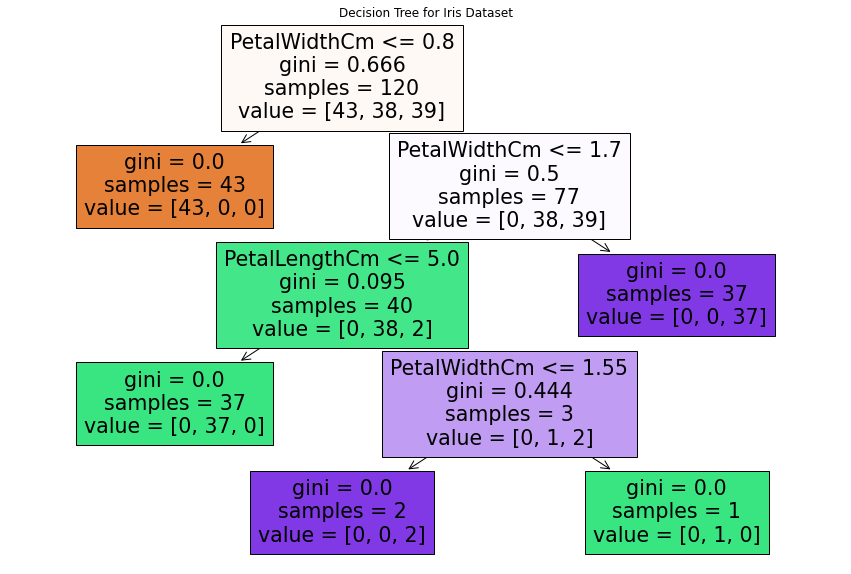

In [20]:
from sklearn import tree

pyplot.figure(figsize=(15,10))
tree.plot_tree(model,feature_names=data.iloc[:,1:5].columns.values,filled=True)
pyplot.title('Decision Tree for Iris Dataset')
pyplot.show()